# Lyrics classification and generation using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dataset = pd.read_csv('lyrics_3genres.csv', index_col=0)
dataset

,de,niggaz,ya,und,yall,ich,fuck,shit,yo,bitch,...,good,night,blue,home,long,littl,well,heart,old,labels
0,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,rap
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,country
2,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,rap
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,rock
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,rock
2996,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,1,0,0,1,rap
2997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,rap
2998,0,0,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,rap


Write code that calculates the probabilities for each dictionary word given the genre

In [3]:
# Sort data into genres
rap = dataset[dataset['labels'] == 'rap']
rock = dataset[dataset['labels'] == 'rock']
country = dataset[dataset['labels'] == 'country']
# Calculate probability of the 30 words for each genre
# Word instances in genre / total amount of words in genre
alpha = 1. # Extra count to avoid probabilities of 0
prap = (np.sum(rap.iloc[:,:-1], axis=0) + alpha) / len(np.argwhere(rap.to_numpy() == 1))
prock = (np.sum(rock.iloc[:,:-1], axis=0) + alpha) / len(np.argwhere(rock.to_numpy() == 1))
pcountry = (np.sum(country.iloc[:,:-1], axis=0) + alpha) / len(np.argwhere(country.to_numpy() == 1))
prob = pd.DataFrame({'rap': prap,
                   'rock': prock,
                   'country': pcountry})
prob

,rap,rock,country
de,0.013993,0.008885,0.001460
niggaz,0.029575,0.001637,0.000834
ya,0.069963,0.010755,0.010842
und,0.010017,0.007482,0.000209
yall,0.044999,0.001637,0.004170
ich,0.009222,0.006313,0.000209
fuck,0.065670,0.020575,0.001877
shit,0.080935,0.009586,0.002502
yo,0.065511,0.005378,0.002711
bitch,0.049769,0.004442,0.001251


Write a function that displays the 5 most probable words for each genre

In [4]:
def give5(data, genre):
    return data.sort_values(genre, axis=0, ascending=False)[genre].iloc[0:5]
print("Top 5 words for rap")
rap_top5 = give5(prob, 'rap')
rap_top5

Top 5 words for rap


shit     0.080935
ya       0.069963
fuck     0.065670
yo       0.065511
bitch    0.049769
Name: rap, dtype: float64

In [5]:
print("Top 5 words for rock")
rock_top5 = give5(prob, 'rock')
rock_top5

Top 5 words for rock


away     0.075053
eye      0.072247
night    0.061959
heart    0.061024
our      0.055646
Name: rock, dtype: float64

In [6]:
print("Top 5 words for country")
country_top5 = give5(prob, 'country')
country_top5

Top 5 words for country


night    0.077982
heart    0.077565
well     0.066931
long     0.065680
littl    0.065054
Name: country, dtype: float64

Explain how these probability estimates can be combined to form a Naive Bayes classifier:
- We coud use this trainig set to try to predict the genre by receiving a single or multiple words as input. The "Naive" part of the classifier corresponds to the "naive" assumption that the words are independent of each other, which is not true, as language follows a structure. Bayes corresponds to the Bayes Theorem which states:
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}. $$

Using the Naive assumption and the Bayes theorem we can build a classifier that calculates the probability of the input words for each genre and return the genre with the higher chance of containing the words given as input.

Consider a Benroulli Naive Bayes approach where each feature is a binary random variable that indicates the presence or absence of each word in a particular track. The likelihood of a track given a particular genre is calculated as the product of the probabilities of each word being present or absent.

In [7]:
genre = ["rap", "rock", "country"]
"""
As we have already calculated the probability
of all words for each genre and the prior is
the same for all 3 genres in this training set,
we only need to multiply the probabilities and
then pick the genre with the highest value.
"""
def BNC(lyrics):
    chance = 1
    lyrics = np.argwhere(lyrics.to_numpy()[:-1] == True) # Get index of words used
    lyrics = lyrics.flatten() # Flatten into 1d array
    for word in lyrics:
        chance = chance * prob.iloc[word,:]
    return genre[np.argmax(chance)]

# Test with a random track
Nbtrack = np.random.randint(0, len(dataset)) # Choose random track
track = dataset.iloc[Nbtrack,:] # Collect from dataset
pred = BNC(track)
print("The track chosen is " + track[-1] + ", track #" + str(Nbtrack))
print("The prediction is " + pred)

The track chosen is rock, track #507
The prediction is rock


C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\1066366330.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The track chosen is " + track[-1] + ", track #" + str(Nbtrack))


Calculate the classification accuracy and confusion matrix that you would obtain using the whole data set for both training and testing partitions

In [8]:
# Classification accuracy
accuracy = np.zeros((len(rap), 3))
for n in range(len(rap)): 
    # For rap
    track = rap.iloc[n,:]
    if track[-1] == BNC(track):
        accuracy[n, 0] = True
    else:
       accuracy[n, 0] = False
    # For rock
    track = rock.iloc[n,:]
    if track[-1] == BNC(track):
        accuracy[n, 1] = True
    else:
       accuracy[n, 1] = False
    # For country
    track = country.iloc[n,:]
    if track[-1] == BNC(track):
        accuracy[n, 2] = True
    else:
       accuracy[n, 2] = False
    
accusum = np.sum(accuracy, axis=0) / len(accuracy) * 100
print("The classification accuracy for rap is " + str(accusum[0]) + " %")
print("The classification accuracy for rock is " + str(accusum[1]) + " %")
print("The classification accuracy for country is " + str(accusum[2]) + " %")
print("The overall accuracy is " + str(np.sum(accusum)/len(accusum)) + " %")

C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\785329243.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if track[-1] == BNC(track):
C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\785329243.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if track[-1] == BNC(track):
C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\785329243.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

The classification accuracy for rap is 80.80000000000001 %
The classification accuracy for rock is 56.00000000000001 %
The classification accuracy for country is 73.6 %
The overall accuracy is 70.13333333333334 %


C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\1403226388.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if track[-1] == genre[pred]:
C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\1403226388.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if track[-1] == genre[pred]:
C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_28952\1403226388.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

<Axes: title={'center': 'Confusion Matrix'}>

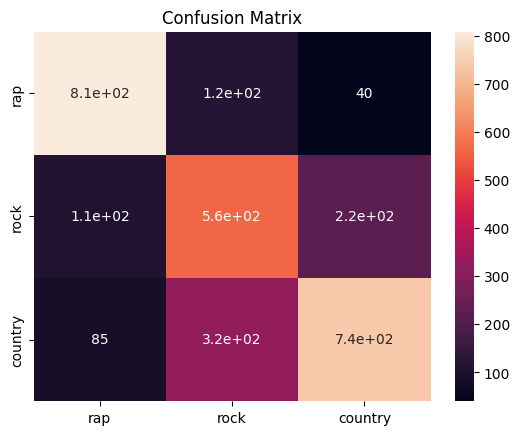

In [9]:
# Modify function to get numerical value instead of string
def BNC(lyrics):
    chance = 1
    lyrics = np.argwhere(lyrics.to_numpy()[:-1] == True) # Get index of words used
    lyrics = lyrics.flatten() # Flatten into 1d array
    for word in lyrics:
        chance = chance * prob.iloc[word,:]
    return np.argmax(chance)

# Confusion Matrix
accuracy = np.zeros((len(rap), 3))
for n in range(len(rap)): 
    # For rap
    track = rap.iloc[n,:]
    pred = BNC(track)
    if track[-1] == genre[pred]:
        accuracy[n, 0] = True
    else:
       accuracy[n, 0] = pred+1
    # For rock
    track = rock.iloc[n,:]
    pred = BNC(track)
    if track[-1] == genre[pred]:
        accuracy[n, 1] = True
    else:
       accuracy[n, 1] = pred
    # For country
    track = country.iloc[n,:]
    pred = BNC(track)
    if track[-1] == genre[pred]:
        accuracy[n, 2] = True
    else:
       accuracy[n, 2] = pred-1
    
cmatrix = np.zeros((3,3))
# Rap
cmatrix[0,0] = len(accuracy[np.argwhere(accuracy[:,0]==True), 0]) # when pred is true
cmatrix[1,0] = len(accuracy[np.argwhere(accuracy[:,0]==2), 0]) # thought rap is rock
cmatrix[2,0] = len(accuracy[np.argwhere(accuracy[:,0]==3), 0]) # thought rap is country
# Rock
cmatrix[1,1] = len(accuracy[np.argwhere(accuracy[:,1]==True), 1]) # pred is true
cmatrix[0,1] = len(accuracy[np.argwhere(accuracy[:,1]==0), 1]) # thought rock is rap
cmatrix[2,1] = len(accuracy[np.argwhere(accuracy[:,1]==2), 1]) # thought rock is country
# Country
cmatrix[2,2] = len(accuracy[np.argwhere(accuracy[:,2]==True), 2]) # pred is true
cmatrix[0,2] = len(accuracy[np.argwhere(accuracy[:,2]==-1), 2]) # thought country is rap
cmatrix[1,2] = len(accuracy[np.argwhere(accuracy[:,2]==0), 2]) # thought country is rock
# Convert np array to pd dataframe
df_cm = pd.DataFrame(cmatrix, index=genre, columns=genre)
# Plot
plt.figure()
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True)

Calculate the classification accuracy and confusion matrix using the k−fold cross-validation, where k = 10.
- There are 3000 tracks in the dataset, 1000 per genre. Therefore, a 10-fold cross validation would require to create 10 datasets of 300 songs each. To ensure all datasets are not biased to favor a certain genre all datasets should have 100 tracks per genre.

In [10]:
# Modify function to work with a list of tracks
def BNC(tracks, prob):
    indices = np.argwhere(tracks == True) # Get index of words used
    wpt = Counter(indices[:,0]) # Get amount of words per track
    i1 = 0
    result = []
    for n in range(len(tracks)):
        trackIndx = indices[:,1][i1:(i1+wpt[n])] # Get index of track
        i1 = i1 + wpt[n]
        track_prob = np.prod(prob.iloc[trackIndx,:], axis=0) # Get probability of track for each genre
        result.append(genre[np.argmax(track_prob)]) # Select genre with highest probability
    return result

In [21]:
def error(data, pred):
    accu = (data==pred)
    rap = np.sum(accu[np.argwhere(data==genre[0]).flatten()]) / len(accu[np.argwhere(data==genre[0]).flatten()]) * 100
    rock = np.sum(accu[np.argwhere(data==genre[1]).flatten()]) / len(accu[np.argwhere(data==genre[1]).flatten()]) * 100
    country = np.sum(accu[np.argwhere(data==genre[2]).flatten()]) / len(accu[np.argwhere(data==genre[2]).flatten()]) * 100
    return [rap, rock, country]

In [36]:
# Create list of track's indices
indices = np.arange(len(rap))
# Shuffle them
np.random.shuffle(indices)
# Take same amount of shuffled tracks per genre
rapSet = rap.iloc[indices,:].to_numpy()
rocSet = rock.iloc[indices,:].to_numpy()
couSet = country.iloc[indices,:].to_numpy()
shuffSet = [rapSet, rocSet, couSet]

# Create partitions
kFolds = 10
rapSets = []
rocSets = []
couSets = []
setLen = int(len(rap)/kFolds)
for k in range(kFolds):
    rapSets.append(shuffSet[0][k*setLen:(k+1)*setLen])
    rocSets.append(shuffSet[1][k*setLen:(k+1)*setLen])
    couSets.append(shuffSet[2][k*setLen:(k+1)*setLen])

# Perform cross-validation
probAVG = np.zeros((30, 3))
for k in range(kFolds):
    # Select sets
    validSet = np.concatenate([rapSets[k], rocSets[k], couSets[k]])
    trainSet = np.concatenate([rapSets[~k], rocSets[~k], couSets[~k]])
    # Calculate probability for each word
    pRap = np.sum(validSet[:setLen,:-1], axis=0) / np.sum(validSet[:setLen,:-1], axis=(0,1))
    pRock = np.sum(validSet[setLen:2*setLen,:-1], axis=0) / np.sum(validSet[setLen:2*setLen,:-1], axis=(0,1))
    pCountry = np.sum(validSet[2*setLen:3*setLen,:-1], axis=0) / np.sum(validSet[2*setLen:3*setLen,:-1], axis=(0,1))
    prob = pd.DataFrame({'rap': pRap,
                   'rock': pRock,
                   'country': pCountry})
    # Test model
    pred = BNC(trainSet, prob)
    # Calculate error of model
    accuracy = error(trainSet[:,-1], pred)
    # Train by averaging the probability
    probAVG[:,0] += prob.iloc[:,0] / kFolds
    probAVG[:,1] += prob.iloc[:,1] / kFolds
    probAVG[:,2] += prob.iloc[:,2] / kFolds

cvProb = pd.DataFrame({'rap': probAVG[:,0],
                   'rock': probAVG[:,1],
                   'country': probAVG[:,2]}) # Results of cross validation
cvProb

,rap,rock,country
0,0.013955,0.008743,0.001271
1,0.029360,0.001361,0.000625
2,0.070054,0.010505,0.010629
3,0.009898,0.007346,0.000000
4,0.044777,0.001414,0.003957
5,0.009120,0.006157,0.000000
6,0.065359,0.020229,0.001634
7,0.080668,0.009193,0.002288
8,0.065366,0.005113,0.002485
9,0.049467,0.004183,0.001038


In [37]:
pred = BNC(dataset, cvProb) # Test k-fold training
accuracy = error(dataset['labels'], pred) # Get error
print("The classification accuracy for rap is " + str(accuracy[0]) + " %")
print("The classification accuracy for rock is " + str(accuracy[1]) + " %")
print("The classification accuracy for country is " + str(accuracy[2]) + " %")
print("The overall accuracy is " + str(np.sum(accuracy)/len(accuracy)) + " %")

The classification accuracy for rap is 80.9 %
The classification accuracy for rock is 56.10000000000001 %
The classification accuracy for country is 73.5 %
The overall accuracy is 70.16666666666667 %


Accuracy results can vary, but are very close to the results with the full dataset, adding some weights to punish when probabilities are wrong could help to improve the probability with every iteration.

<Axes: title={'center': 'Confusion Matrix'}>

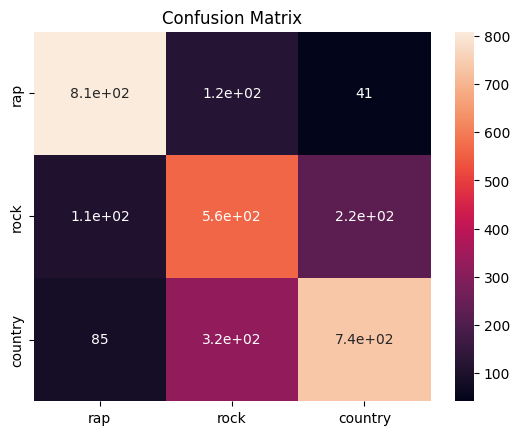

In [44]:
# Confusion Matrix
predRap = BNC(rap, cvProb)
predRock = BNC(rock, cvProb)
predCountry = BNC(country, cvProb)

cmatrix = np.zeros((3,3))
# Rap
cmatrix[0,0] = Counter(predRap)['rap'] # when pred is true
cmatrix[1,0] = Counter(predRap)['rock'] # thought rap is rock
cmatrix[2,0] = Counter(predRap)['country'] # thought rap is country
# Rock
cmatrix[1,1] = Counter(predRock)['rock'] # pred is true
cmatrix[0,1] = Counter(predRock)['rap'] # thought rock is rap
cmatrix[2,1] = Counter(predRock)['country'] # thought rock is country
# Country
cmatrix[2,2] = Counter(predCountry)['country'] # pred is true
cmatrix[0,2] = Counter(predCountry)['rap'] # thought country is rap
cmatrix[1,2] = Counter(predCountry)['rock'] # thought country is rock
# Convert np array to pd dataframe
df_cm = pd.DataFrame(cmatrix, index=genre, columns=genre)
# Plot
plt.figure()
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True)

To generate lyrics for a certain genre I will use the same method taught in the course. However, I will use the choice function in numpy where I can assign a the distribution of each word and have numpy choose that word based on each their probability.

In [111]:
# Generate random intiger number between 0 and the total of words
def genLyrics(genre, NbWords):
    # Generate random amount of lyrics based on probabilities calculated
    randIndx = np.random.choice(np.arange(30), size=NbWords, p=cvProb.to_numpy()[:,genre])
    # Pick words
    lyrics = dataset.columns[randIndx]
    return lyrics

# 0 for rap, 1 for rock, 2 for country
print("5 examples of generated rap lyrics, 10 words each:")
for n in range(5):
    print(genLyrics(0, 10))

5 examples of generated rap lyrics, 10 words each:
Index(['old', 'niggaz', 'ya', 'yo', 'fuck', 'again', 'wait', 'yall', 'our',
       'good'],
      dtype='object')
Index(['our', 'noth', 'yo', 'fuck', 'shit', 'good', 'fuck', 'yall', 'yo',
       'shit'],
      dtype='object')
Index(['good', 'fall', 'shit', 'fall', 'yall', 'fall', 'home', 'shit', 'good',
       'yo'],
      dtype='object')
Index(['heart', 'eye', 'yo', 'yo', 'niggaz', 'de', 'ya', 'lie', 'eye', 'yall'], dtype='object')
Index(['light', 'ich', 'good', 'heart', 'shit', 'eye', 'light', 'home', 'lie',
       'old'],
      dtype='object')


In [112]:
print("5 examples of generated rock lyrics, 10 words each:")
for n in range(5):
    print(genLyrics(1, 10))

5 examples of generated rock lyrics, 10 words each:
Index(['well', 'again', 'end', 'light', 'long', 'light', 'away', 'away', 'eye',
       'noth'],
      dtype='object')
Index(['night', 'eye', 'fall', 'fall', 'lie', 'good', 'old', 'again', 'light',
       'blue'],
      dtype='object')
Index(['fall', 'well', 'eye', 'good', 'noth', 'end', 'home', 'well', 'light',
       'eye'],
      dtype='object')
Index(['gone', 'old', 'fall', 'night', 'eye', 'lie', 'yo', 'end', 'gone',
       'light'],
      dtype='object')
Index(['eye', 'well', 'away', 'gone', 'night', 'eye', 'littl', 'long', 'our',
       'eye'],
      dtype='object')


In [113]:
print("5 examples of generated country lyrics, 10 words each:")
for n in range(5):
    print(genLyrics(2, 10))

5 examples of generated country lyrics, 10 words each:
Index(['light', 'eye', 'again', 'good', 'gone', 'heart', 'noth', 'long',
       'noth', 'eye'],
      dtype='object')
Index(['night', 'well', 'light', 'old', 'night', 'night', 'away', 'old',
       'well', 'well'],
      dtype='object')
Index(['good', 'eye', 'well', 'heart', 'gone', 'home', 'well', 'fall', 'our',
       'good'],
      dtype='object')
Index(['long', 'gone', 'heart', 'heart', 'wait', 'heart', 'night', 'old',
       'night', 'our'],
      dtype='object')
Index(['littl', 'night', 'home', 'blue', 'wait', 'eye', 'blue', 'well',
       'light', 'lie'],
      dtype='object')
